In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scio
from sklearn.linear_model import Ridge

%load_ext autoreload
%autoreload 2
import main

In [188]:
mat = scio.loadmat('ex9_movies.mat')

# TODO: mean normalization: rows, columns and total
# TODO: only calculate the mean for present values
r = pd.DataFrame(mat['R'])
# y = pd.DataFrame(mat['Y'])[r == 1]
y = pd.DataFrame(mat['Y'])

In [ ]:
# TODO: automatically select n
n = 10
x = np.random.random((y.shape[0], n))
theta = np.random.random((y.shape[1], n))

alpha = 0.00008
tolerance = 2
reg_param = 1

# TODO: try running PCA first
progress = []
for x, theta, cost in main.run_descent(alpha, tolerance, theta, x, y, r, reg_param):
    print(cost)
    progress.append(cost)
    
plt.plot(progress)

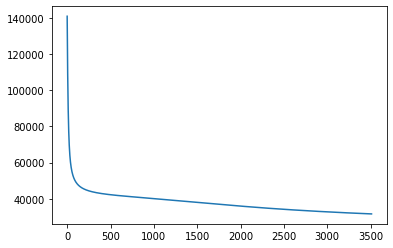

In [189]:
plt.plot(progress)
plt.show()

In [186]:
my_rating = np.zeros(y.shape[0])

my_rating[50] = 5 # star wars
my_rating[56] = 5 # pulp fiction
my_rating[64] = 5 # shawshank redemption
my_rating[65] = 3 # what's eating gilbert grape
my_rating[69] = 5 # forrest gump
my_rating[71] = 4 # lion king
my_rating[79] = 4 # the fugitive
my_rating[86] = 5 # remains of the day
my_rating[89] = 4 # blade runner
my_rating[94] = 3 # home alone
my_rating[96] = 5 # terminator 2
my_rating[98] = 5 # silence of the lambs
my_rating[127] = 5 # godfather
my_rating[135] = 4 # 2001 space odyssey
my_rating[151] = 4 # willie wonka
my_rating[172] = 5 # empire strikes back
my_rating[174] = 4 # raiders of the lost ark
my_rating[178] = 5 # 12 angry men
my_rating[181] = 5 # return of the jedi
my_rating[185] = 4 # psycho
my_rating[195] = 5 # terminator
my_rating[196] = 4 # dead poets society
my_rating[200] = 3 # shining
my_rating[202] = 5 # groundhog day
my_rating[483] = 4 # Casablanca (1942)
my_rating[755] = 3 # Jumanji (1995)
my_rating[902] = 5 # Big Lebowski, The (1998)
my_rating[1127] = 5 # Truman Show, The (1998)
my_rating[204] = 5 # Back to the Future (1985)
my_rating[209] = 3 # This Is Spinal Tap (1984)
my_rating[214] = 2 # Pink Floyd - The Wall (1982)
my_rating[216] = 4 # When Harry Met Sally... (1989)
my_rating[250] = 4 # Fifth Element, The (1997)
my_rating[257] = 4 # Men in Black (1997)
my_rating[302] = 5 # L.A. Confidential (1997)
my_rating[318] = 5 # Schindler's List (1993)
my_rating[340] = 4 # Boogie Nights (1997)

# indexes in the file start with one, compensate
my_rating = np.roll(my_rating, -1, axis=0)
my_rating = pd.Series(my_rating)
my_actual_rating = my_rating[my_rating > 0]
my_movies = x.iloc[my_actual_rating]

all_movies = pd.read_csv('movie_ids.txt', header=None, quotechar='"').iloc[:, 1]

In [187]:
# we created linear regression in the 1st lab, no need to repeat the code here
reg = Ridge(alpha=0.1).fit(my_movies, my_actual_rating)
prediction = pd.Series(reg.predict(x))
prediction = prediction.sort_values(ascending=False)
for i, score in prediction.iloc[:20].iteritems():
    print('{}: {}'.format(all_movies.iat[i], score))

Highlander (1986): 5.728839083441782
M*A*S*H (1970): 5.364936477106315
Apt Pupil (1998): 5.326645001803318
Shall We Dance? (1996): 5.313734419839206
Body Snatcher, The (1945): 5.300216618589752
Butcher Boy, The (1998): 5.245175791808727
Speed (1994): 5.187545725743342
Dolores Claiborne (1994): 5.175382188084284
Event Horizon (1997): 5.154579429543501
C'est arrivé près de chez vous (1992): 5.153113191062481
Safe (1995): 5.150264506660337
Cook the Thief His Wife & Her Lover, The (1989): 5.143826750702315
Courage Under Fire (1996): 5.125414147871106
Mother (1996): 5.112838982120777
Big Blue, The (Grand bleu, Le) (1988): 5.103076212709746
Mary Shelley's Frankenstein (1994): 5.098805014149778
Great Day in Harlem, A (1994): 5.086731005607059
Schindler's List (1993): 5.084809145604135
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991): 5.079417315194116
Nightmare on Elm Street, A (1984): 5.053831570332282
